In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("data.csv")

In [ ]:
df

,Unnamed: 0,Date,Low,High,Close,Open
0,5453,2021-07-06,140.070,143.15,142.02,140.07
1,5452,2021-07-02,137.745,140.00,139.96,137.90
2,5451,2021-07-01,135.760,137.33,137.27,136.60
3,5450,2021-06-30,135.870,137.41,136.96,136.17
4,5449,2021-06-29,134.350,136.49,136.33,134.80
...,...,...,...,...,...,...
5449,4,1999-11-05,84.000,88.37,88.31,84.62
5450,3,1999-11-04,80.620,85.37,83.62,82.06
5451,2,1999-11-03,81.000,83.25,81.50,81.62
5452,1,1999-11-02,77.310,81.69,80.25,78.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5454 non-null   int64  
 1   Date        5454 non-null   object 
 2   Low         5454 non-null   float64
 3   High        5454 non-null   float64
 4   Close       5454 non-null   float64
 5   Open        5454 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 255.8+ KB


In [ ]:
df=df.drop(["Unnamed: 0"],axis=1)

In [ ]:
df.shape

(5454, 5)

In [ ]:
df_train=df.iloc[int(0.3*df.shape[0]):,:]
df_test=df.iloc[:int(0.3*df.shape[0]),:]

In [ ]:
df_train

,Date,Low,High,Close,Open
1636,2015-01-05,105.41,108.65,106.25,108.29
1637,2015-01-02,107.35,111.44,109.33,111.39
1638,2014-12-31,110.21,113.13,110.38,112.82
1639,2014-12-30,112.11,113.92,112.52,113.64
1640,2014-12-29,113.70,114.77,113.91,113.79
...,...,...,...,...,...
5449,1999-11-05,84.00,88.37,88.31,84.62
5450,1999-11-04,80.62,85.37,83.62,82.06
5451,1999-11-03,81.00,83.25,81.50,81.62
5452,1999-11-02,77.31,81.69,80.25,78.00


In [ ]:
df_train=df_train.iloc[::-1]

# data rows are reversed

In [ ]:
df_train

,Date,Low,High,Close,Open
5453,1999-11-01,77.37,80.69,77.62,80.00
5452,1999-11-02,77.31,81.69,80.25,78.00
5451,1999-11-03,81.00,83.25,81.50,81.62
5450,1999-11-04,80.62,85.37,83.62,82.06
5449,1999-11-05,84.00,88.37,88.31,84.62
...,...,...,...,...,...
1640,2014-12-29,113.70,114.77,113.91,113.79
1639,2014-12-30,112.11,113.92,112.52,113.64
1638,2014-12-31,110.21,113.13,110.38,112.82
1637,2015-01-02,107.35,111.44,109.33,111.39


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 5})


In [ ]:
x=df_train['Date']
y_low=df_train['Low']
y_high=df_train['High']
y_close=df_train['Close']
y_open=df_train['Open']

In [ ]:
x

5453    1999-11-01
5452    1999-11-02
5451    1999-11-03
5450    1999-11-04
5449    1999-11-05
           ...    
1640    2014-12-29
1639    2014-12-30
1638    2014-12-31
1637    2015-01-02
1636    2015-01-05
Name: Date, Length: 3818, dtype: object

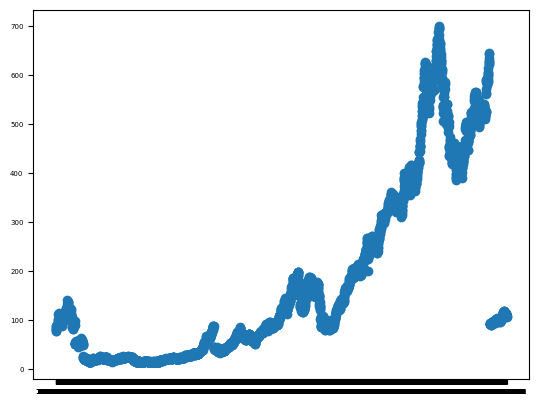

In [ ]:
plt.scatter(x,y_low)

In [ ]:
plt.show()

In [ ]:
time_lag = 120

In [ ]:
display(y_high.iloc[time_lag:].shape)
display(y_high.iloc[0:len(y_high) - time_lag].shape)
len(y_high.iloc[time_lag:].to_numpy() - y_high.iloc[0:len(y_high) - time_lag].to_numpy())

(3698,)

(3698,)

3698

In [ ]:
display(x.iloc[time_lag:].shape)
display((y_high.iloc[time_lag:]-y_high.iloc[0:len(y_high) - time_lag]).shape)

(3698,)

(3818,)

In [ ]:
for period in range(0, len(x)-time_lag, time_lag):
    print(period)

0
120
240
360
480
600
720
840
960
1080
1200
1320
1440
1560
1680
1800
1920
2040
2160
2280
2400
2520
2640
2760
2880
3000
3120
3240
3360
3480
3600


In [ ]:
# def breakSegs(X,Y,time_lag):
#     i = 0
#     for period in range(0, len(Y)-time_lag, time_lag):
#         print(period,period+time_lag,": ")
#         Z=Y.iloc[period:period+time_lag]
#         maxValue=max(Z)
#         minValue=min(Z)
#         print(maxValue,minValue)
#         for j in range(period,period+time_lag):
#             Y.iloc[j]/=(maxValue-minValue)
#         print(Y[Y>1])


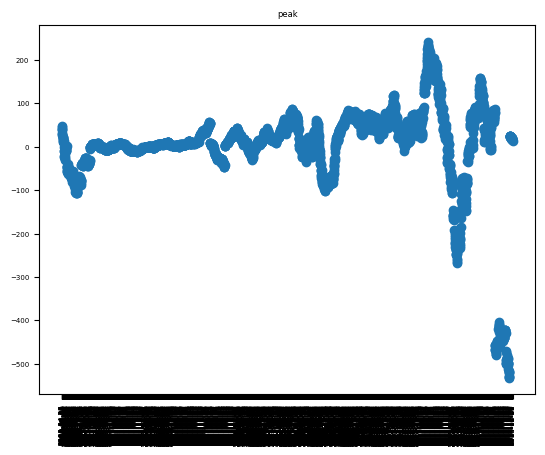

In [ ]:
plt.scatter(x.iloc[time_lag:], y_high.iloc[time_lag:].to_numpy() - y_high.iloc[0:len(y_high) - time_lag].to_numpy())
plt.xticks(x.iloc[time_lag:],rotation = 90)
plt.title('peak')
plt.show()


In [ ]:
y_new=y_high.iloc[time_lag:].to_numpy() - y_high.iloc[0:len(y_high) - time_lag]
y_new

5453    39.81
5452    47.06
5451    44.75
5450    41.63
5449    39.13
        ...  
1760    18.82
1759    18.37
1758    17.24
1757    14.55
1756    11.80
Name: High, Length: 3698, dtype: float64

In [ ]:
len(x.iloc[70:len(y_high)])

3748

In [ ]:
len(y_high.iloc[70:len(y_high)]-y_high.iloc[0:len(y_high)-70])

3818

In [ ]:
plt.show()

# difference between high prce and low price trend to show that they follow almost same trend

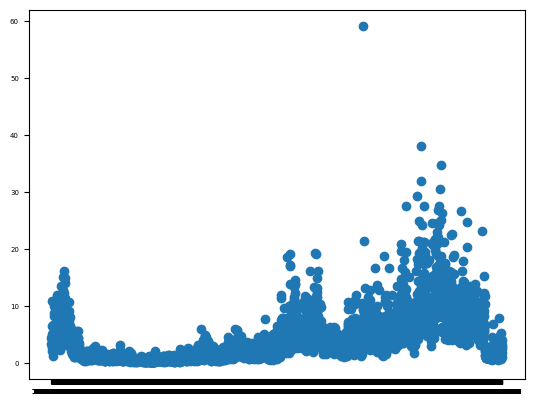

In [ ]:
plt.scatter(x,y_high-y_low)

In [ ]:
plt.show()

# this show the trend of opening stock price

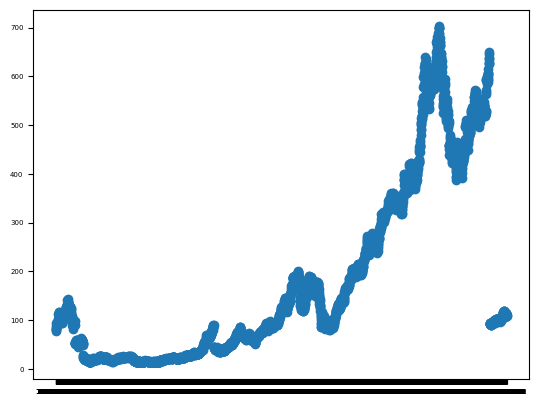

In [ ]:
plt.scatter(x,y_open)
plt.show()

# This shows the trend between closing stock price and time

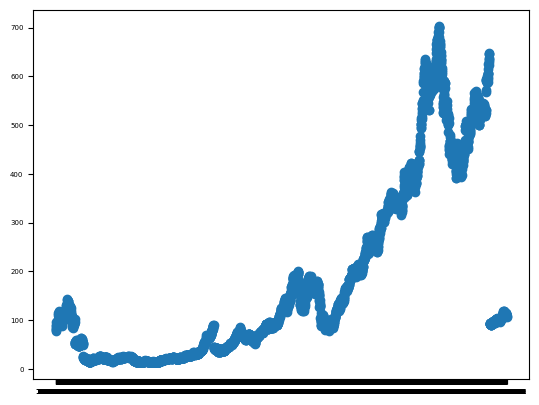

In [ ]:
plt.scatter(x,y_close)
plt.show()

# Difference between the opening and closing price

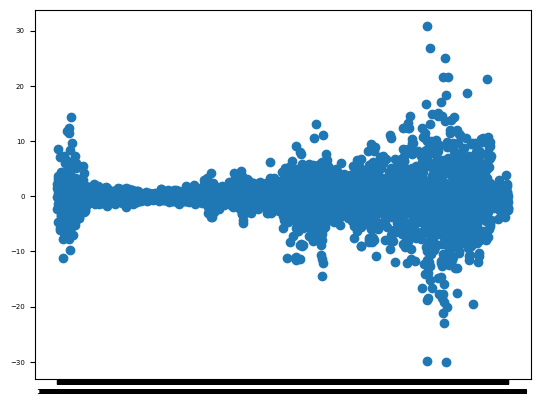

In [ ]:
plt.scatter(x,y_close-y_open)

In [ ]:
plt.show()

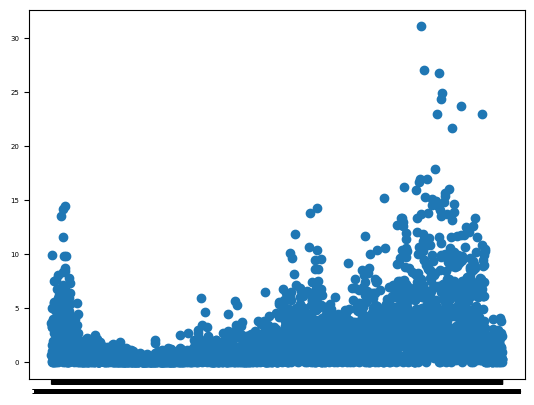

In [ ]:
plt.scatter(x,y_high-y_open)
plt.show()

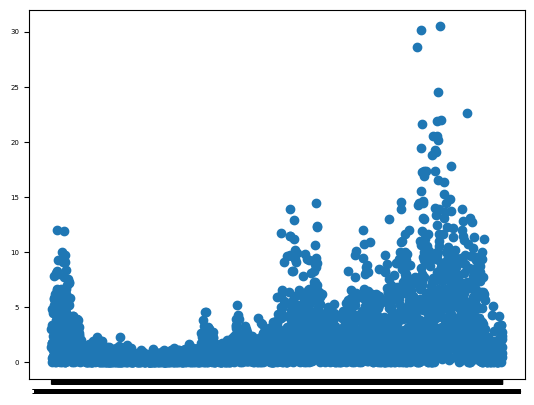

In [ ]:
plt.scatter(x,y_high-y_close)

In [ ]:
plt.show()

# From here onwards we use the ARIMA model

In [ ]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable


# Calculating p value and ADF Statistics of opening,closing,high and low values

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_train.Open.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.727597
p-value: 0.416953


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_train.Close.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.740957
p-value: 0.410143


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_train.High.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.692975
p-value: 0.434735


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_train.Low.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.751467
p-value: 0.404809


# As the p value is more than 0.05 we go ahead to check the order of differencing

In [ ]:
df_train

,Date,Low,High,Close,Open
5453,1999-11-01,77.37,80.69,77.62,80.00
5452,1999-11-02,77.31,81.69,80.25,78.00
5451,1999-11-03,81.00,83.25,81.50,81.62
5450,1999-11-04,80.62,85.37,83.62,82.06
5449,1999-11-05,84.00,88.37,88.31,84.62
...,...,...,...,...,...
1640,2014-12-29,113.70,114.77,113.91,113.79
1639,2014-12-30,112.11,113.92,112.52,113.64
1638,2014-12-31,110.21,113.13,110.38,112.82
1637,2015-01-02,107.35,111.44,109.33,111.39


In [ ]:
df_train=df_train.reset_index(drop=True)
df_train

,Date,Low,High,Close,Open
0,1999-11-01,77.37,80.69,77.62,80.00
1,1999-11-02,77.31,81.69,80.25,78.00
2,1999-11-03,81.00,83.25,81.50,81.62
3,1999-11-04,80.62,85.37,83.62,82.06
4,1999-11-05,84.00,88.37,88.31,84.62
...,...,...,...,...,...
3813,2014-12-29,113.70,114.77,113.91,113.79
3814,2014-12-30,112.11,113.92,112.52,113.64
3815,2014-12-31,110.21,113.13,110.38,112.82
3816,2015-01-02,107.35,111.44,109.33,111.39


# This code finds the date for which there is a sudden fall in stock prices which may have happened due to stock split

In [ ]:
index=0
for i in range(1,len(y_open)):
    if(abs(y_open.iloc[i]-y_open.iloc[i-1])>400):
        index=i
index

3672

In [ ]:
y_open.iloc[3671]

649.9

In [ ]:
y_open.iloc[3672]

92.7

# This is the date till which we apply the arima model ie till index 3672

In [ ]:
df_train['Date'].iloc[3671]

'2014-06-06'

In [ ]:
df_train['Date'].iloc[3672]

'2014-06-09'

# same code for y_high where the point of discontinuity is same as y_open thus making the conclusion that Opening price and Highest Price follow same trend more stronger

# Thus opening price,closing price,highest and lowest price follow the same trend

In [ ]:
index1=0
for i in range(1,len(y_open)):
    if(abs(y_high.iloc[i]-y_high.iloc[i-1])>400):
        index1=i
index1

3672

In [ ]:
Y_open_new=y_open.iloc[:index]

In [ ]:
Y_open_new=Y_open_new.reset_index(drop=True)

In [ ]:
Y_open_new

0        80.00
1        78.00
2        81.62
3        82.06
4        84.62
         ...  
3667    633.96
3668    628.46
3669    637.44
3670    646.20
3671    649.90
Name: Open, Length: 3672, dtype: float64

# Checking the order of differencing

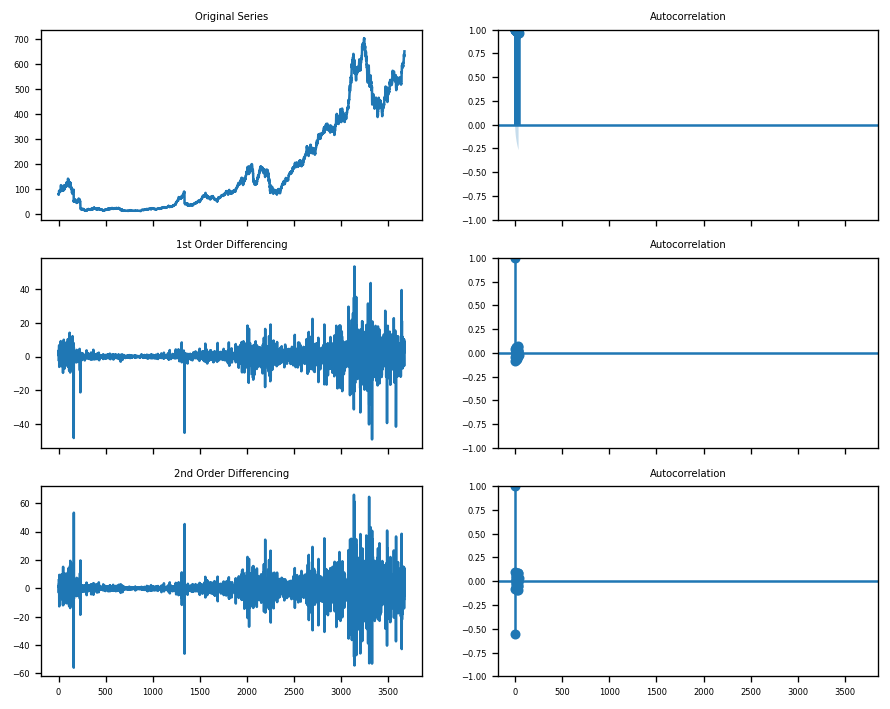

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(Y_open_new); axes[0, 0].set_title('Original Series')
plot_acf(Y_open_new, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(Y_open_new.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(Y_open_new.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(Y_open_new.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(Y_open_new.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

/home/arup/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


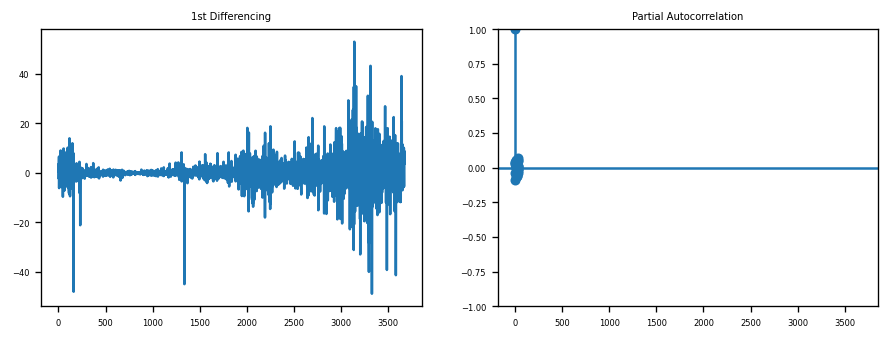

In [ ]:
#finding the p terms of ARIMA
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(Y_open_new.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(Y_open_new.diff().dropna(), ax=axes[1])

plt.show()
#significant lag at p=1

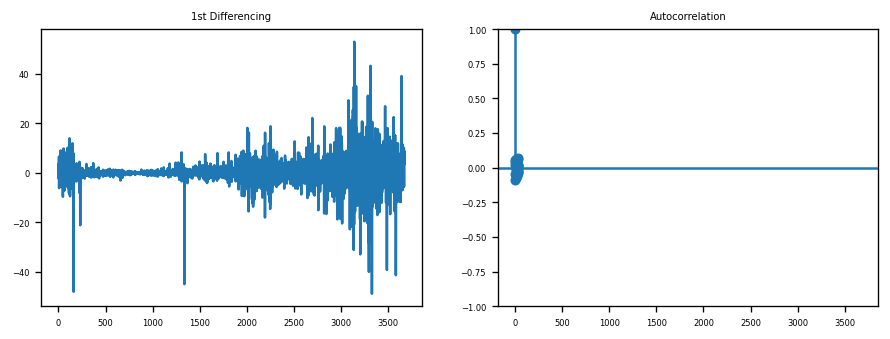

In [ ]:
#finding the q value
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(Y_open_new.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(Y_open_new.diff().dropna(), ax=axes[1])

plt.show()
# q=1

In [ ]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 2.1 MB/s eta 0:00:001.7 MB/s eta 0:00:01


In [ ]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [ ]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')
#read data
Apple_sales = pd.read_csv('data.csv', parse_dates=[1], index_col=1, date_parser=parser)


In [ ]:
Apple_sales=Apple_sales.drop(["Unnamed: 0"],axis=1)


In [ ]:
Apple_sales

,Low,High,Close,Open
Date,,,,
2021-07-06,140.070,143.15,142.02,140.07
2021-07-02,137.745,140.00,139.96,137.90
2021-07-01,135.760,137.33,137.27,136.60
2021-06-30,135.870,137.41,136.96,136.17
2021-06-29,134.350,136.49,136.33,134.80
...,...,...,...,...
1999-11-05,84.000,88.37,88.31,84.62
1999-11-04,80.620,85.37,83.62,82.06
1999-11-03,81.000,83.25,81.50,81.62


In [ ]:
Apple_open_sales=Apple_sales['Open']

In [ ]:
#infer the frequency of the data
Apple_sales = Apple_sales.asfreq(pd.infer_freq(Apple_sales.index))
Apple_sales=Apple_sales.interpolate()


In [ ]:
Apple_sales

,Low,High,Close,Open
Date,,,,
1999-11-01,77.37000,80.6900,77.620,80.0000
1999-11-02,77.31000,81.6900,80.250,78.0000
1999-11-03,81.00000,83.2500,81.500,81.6200
1999-11-04,80.62000,85.3700,83.620,82.0600
1999-11-05,84.00000,88.3700,88.310,84.6200
...,...,...,...,...
2021-07-02,137.74500,140.0000,139.960,137.9000
2021-07-03,138.32625,140.7875,140.475,138.4425
2021-07-04,138.90750,141.5750,140.990,138.9850


In [ ]:
Apple_sales.shape

(7919, 4)

In [ ]:
split=0.3

In [ ]:
Apple_sales_train=Apple_sales.iloc[:int(0.8*Apple_sales.shape[0]),:]
Apple_sales_test=Apple_sales.iloc[int(0.8*Apple_sales.shape[0]):,:]

Text(0, 0.5, 'Price')

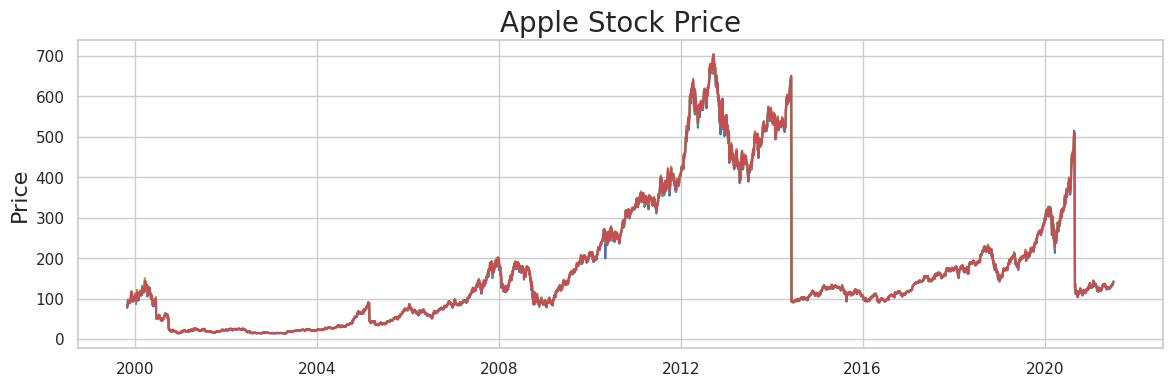

In [ ]:
#transform
start_date = datetime(1999,11,1)
end_date = datetime(2016,7,6)
#lim_Apple_sales = Apple_sales[start_date:end_date:10]

#plot
plt.figure(figsize=(14,4))
plt.plot(Apple_sales)
plt.title('Apple Stock Price', fontsize=20)
plt.ylabel('Price', fontsize=16)

Text(0, 0.5, 'Price')

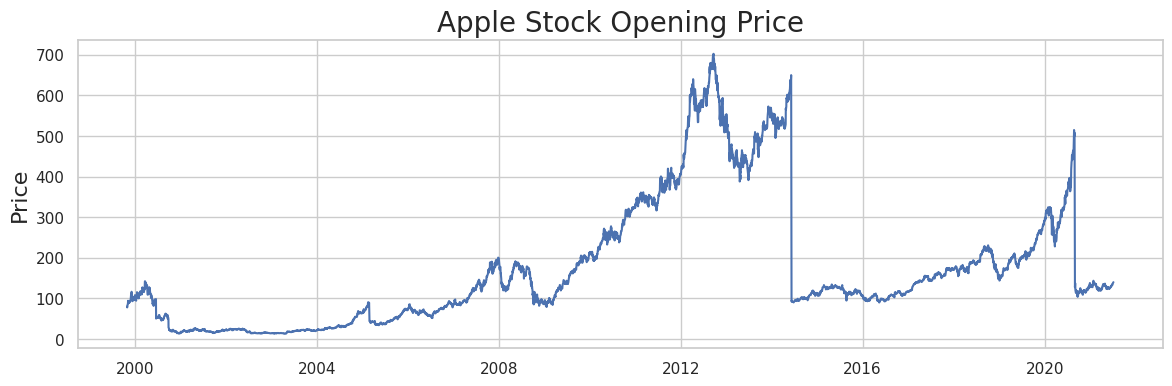

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(Apple_sales["Open"])
plt.title('Apple Stock Opening Price', fontsize=20)
plt.ylabel('Price', fontsize=16)

Text(0, 0.5, 'Price')

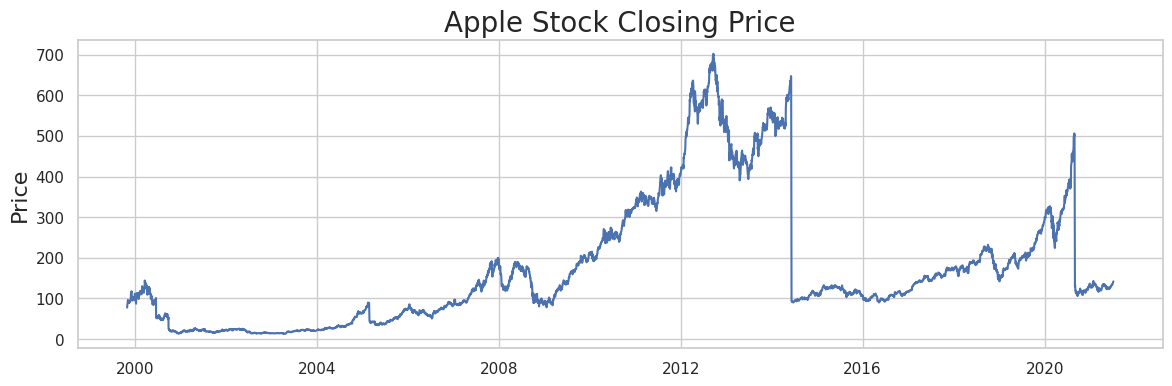

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(Apple_sales["Close"])
plt.title('Apple Stock Closing Price', fontsize=20)
plt.ylabel('Price', fontsize=16)

Text(0, 0.5, 'Price')

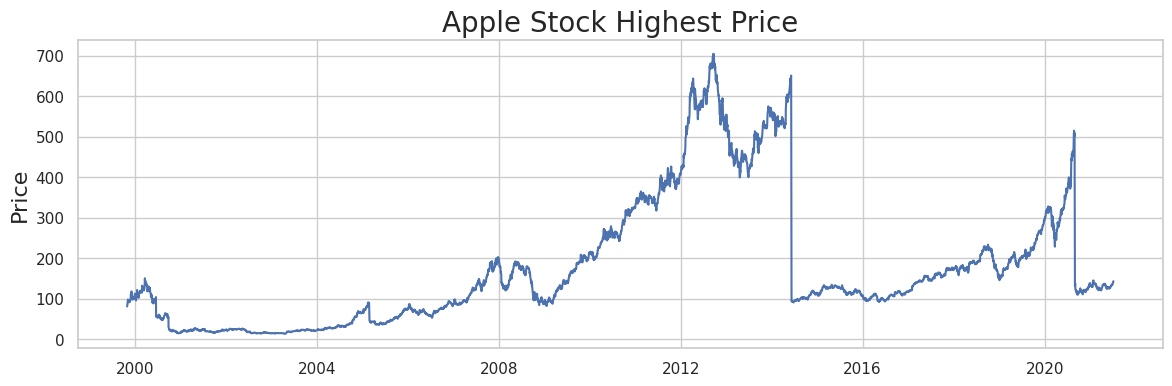

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(Apple_sales['High'])
plt.title('Apple Stock Highest Price', fontsize=20)
plt.ylabel('Price', fontsize=16)

Text(0, 0.5, 'Price')

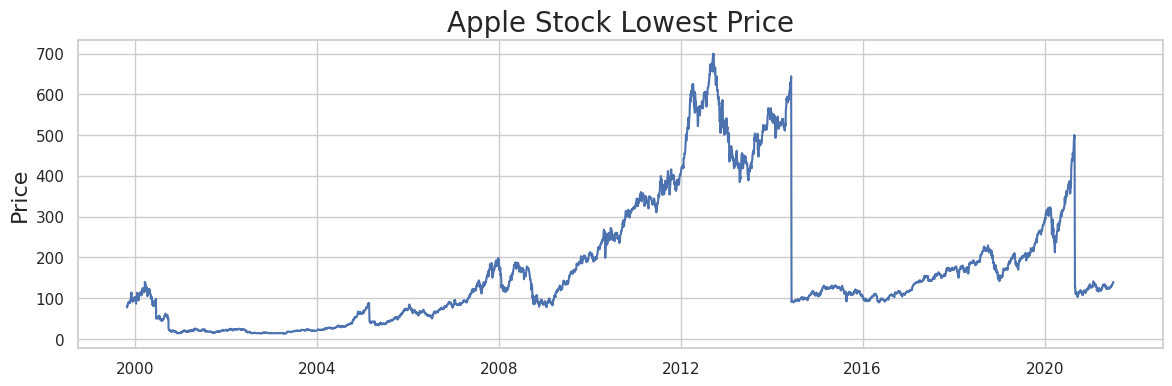

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(Apple_sales['Low'])
plt.title('Apple Stock Lowest Price', fontsize=20)
plt.ylabel('Price', fontsize=16)

In [ ]:

Apple_sales_train

,Low,High,Close,Open
Date,,,,
1999-11-01,77.370000,80.6900,77.620000,80.000
1999-11-02,77.310000,81.6900,80.250000,78.000
1999-11-03,81.000000,83.2500,81.500000,81.620
1999-11-04,80.620000,85.3700,83.620000,82.060
1999-11-05,84.000000,88.3700,88.310000,84.620
...,...,...,...,...
2017-03-01,137.595000,140.1500,139.790000,137.890
2017-03-02,138.760000,140.2786,138.960000,140.000
2017-03-03,138.590000,139.8300,139.780000,138.780


Text(0, 0.5, 'Price')

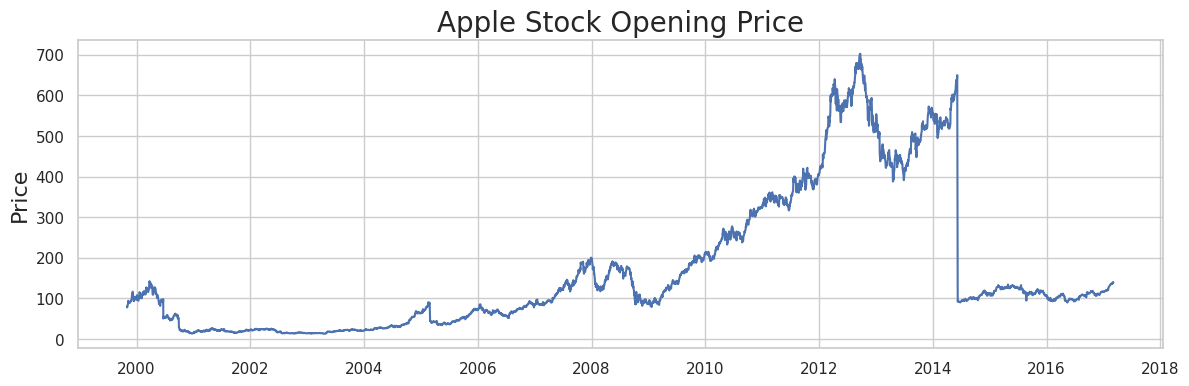

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(Apple_sales_train['Open'])
plt.title('Apple Stock Opening Price', fontsize=20)
plt.ylabel('Price', fontsize=16)

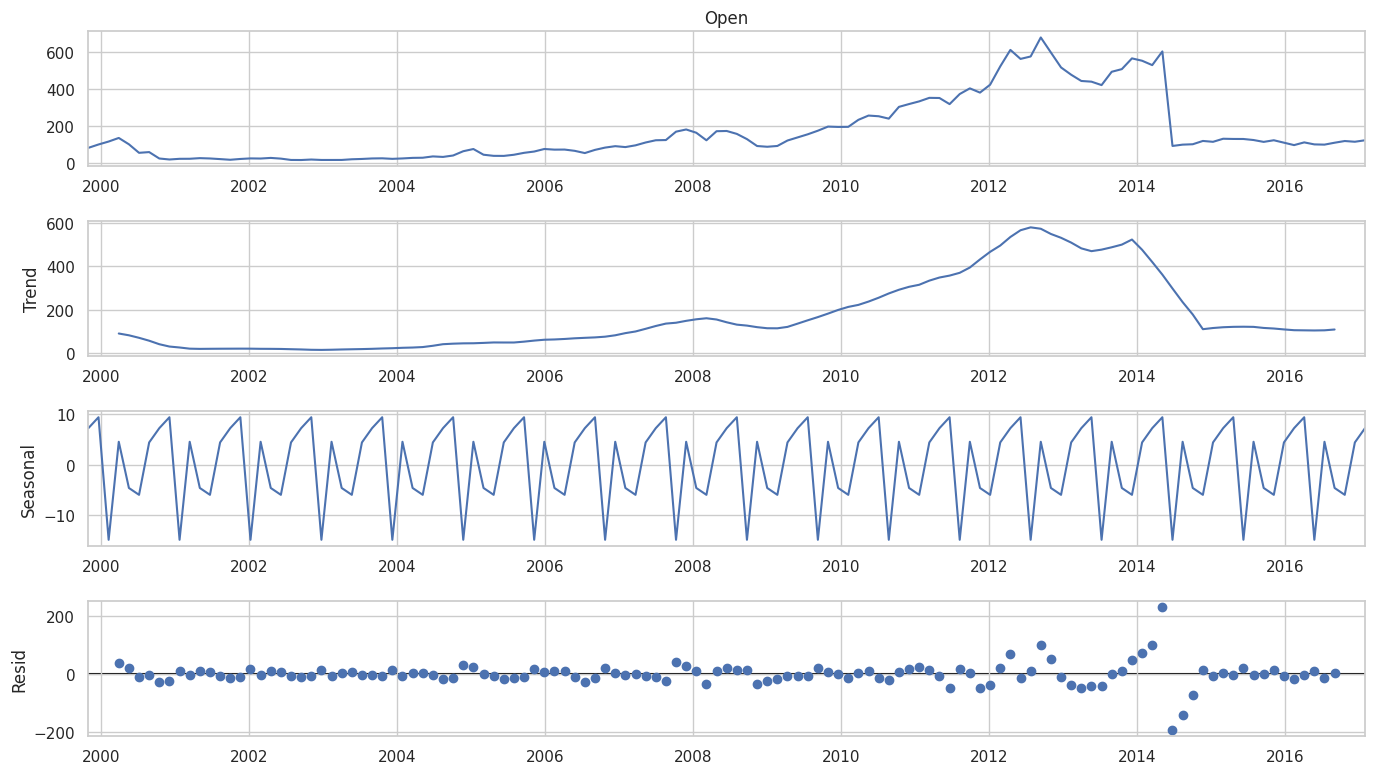

In [ ]:
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(Apple_sales_train['Open'].iloc[::50],model='additive')
fig = result.plot()

# A six 12 month seasonal pattern is observed
# downward and upward tredns is evident

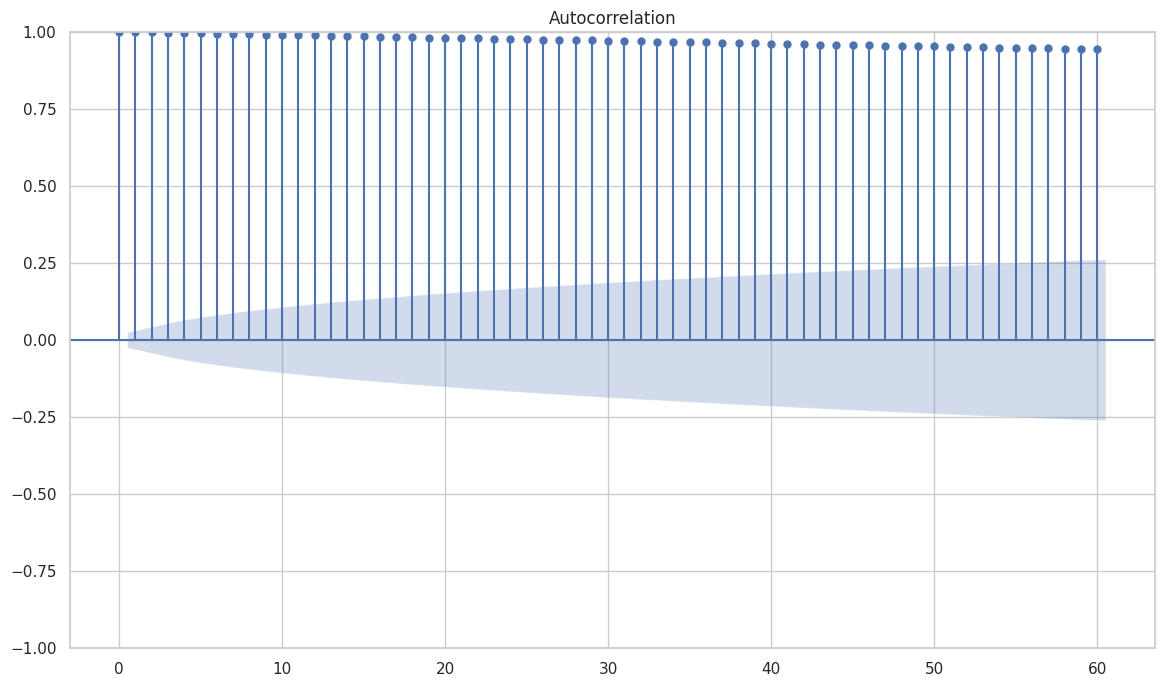

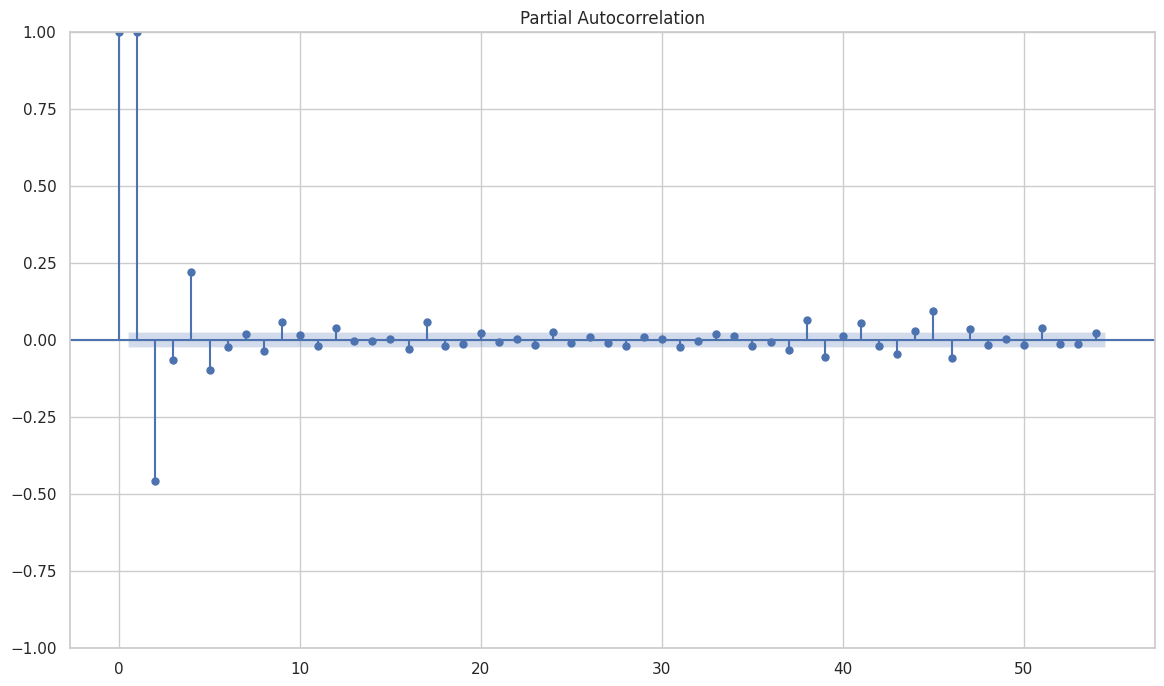

In [ ]:
plot_acf(Apple_sales_train['Open'], lags=60);
plot_pacf(Apple_sales_train['Open'], lags=54);

In [ ]:
arima = ARIMA(Apple_sales_train['Open'], order=(12,2,2))
predictions = arima.fit().predict()

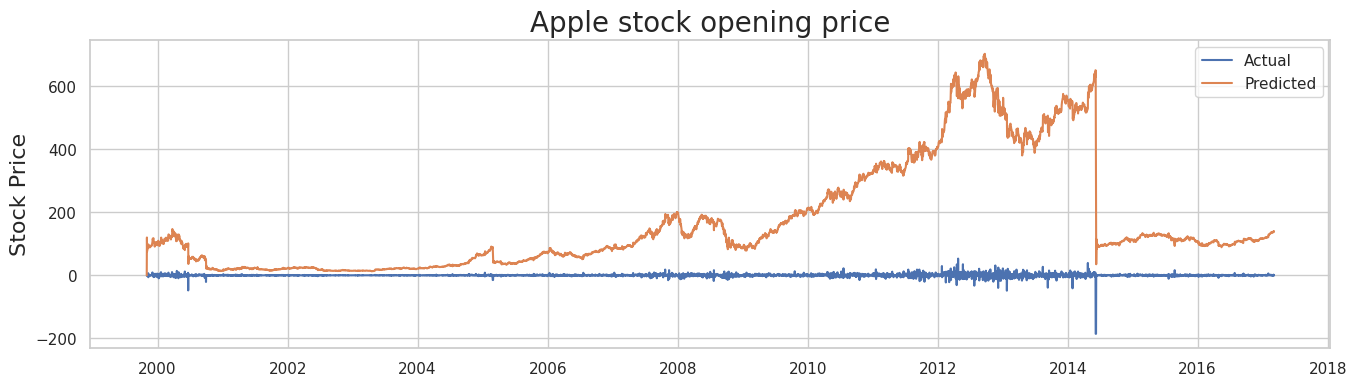

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(Apple_sales_train['Open'].diff(), label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Apple stock opening price', fontsize=20)
plt.ylabel('Stock Price', fontsize=16)
plt.legend()

In [ ]:
print(arima.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 6335
Model:                ARIMA(12, 2, 2)   Log Likelihood              -19301.776
Date:                Mon, 28 Nov 2022   AIC                          38633.551
Time:                        17:10:19   BIC                          38734.854
Sample:                    11-01-1999   HQIC                         38668.635
                         - 03-05-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6556      0.068     -9.705      0.000      -0.788      -0.523
ar.L2          0.4415      0.022     20.438      0.000       0.399       0.484
ar.L3         -0.0139      0.009     -1.511      0.1

In [ ]:
Apple_sales_test['Open']

Date
2017-03-06    139.3650
2017-03-07    139.0600
2017-03-08    138.9500
2017-03-09    138.7400
2017-03-10    139.2500
                ...   
2021-07-02    137.9000
2021-07-03    138.4425
2021-07-04    138.9850
2021-07-05    139.5275
2021-07-06    140.0700
Freq: D, Name: Open, Length: 1584, dtype: float64

In [ ]:
predictions

Date
1999-11-01      0.000000
1999-11-02    120.000171
1999-11-03     76.001316
1999-11-04     83.029610
1999-11-05     83.247405
                 ...    
2017-03-01    137.055129
2017-03-02    138.119671
2017-03-03    140.724511
2017-03-04    138.584732
2017-03-05    138.650261
Freq: D, Name: predicted_mean, Length: 6335, dtype: float64

In [ ]:
Apple_sales_train['Open']

Date
1999-11-01     80.000
1999-11-02     78.000
1999-11-03     81.620
1999-11-04     82.060
1999-11-05     84.620
               ...   
2017-03-01    137.890
2017-03-02    140.000
2017-03-03    138.780
2017-03-04    138.975
2017-03-05    139.170
Freq: D, Name: Open, Length: 6335, dtype: float64

In [ ]:
arima.fit

<bound method ARIMA.fit of <statsmodels.tsa.arima.model.ARIMA object at 0x7fb8b59efbb0>>

In [ ]:
arima.fit().predict

<bound method MLEResults.predict of <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7fb8b56f6d40>>

In [ ]:
arima.fit().predict()

Date
1999-11-01      0.000000
1999-11-02    120.000171
1999-11-03     76.001316
1999-11-04     83.029610
1999-11-05     83.247405
                 ...    
2017-03-01    137.055129
2017-03-02    138.119671
2017-03-03    140.724511
2017-03-04    138.584732
2017-03-05    138.650261
Freq: D, Name: predicted_mean, Length: 6335, dtype: float64

In [ ]:
arima.fit().forecast

<bound method MLEResults.forecast of <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7fb8b56f6200>>

In [ ]:
test_predictions=arima.fit().forecast(len(Apple_sales_test))

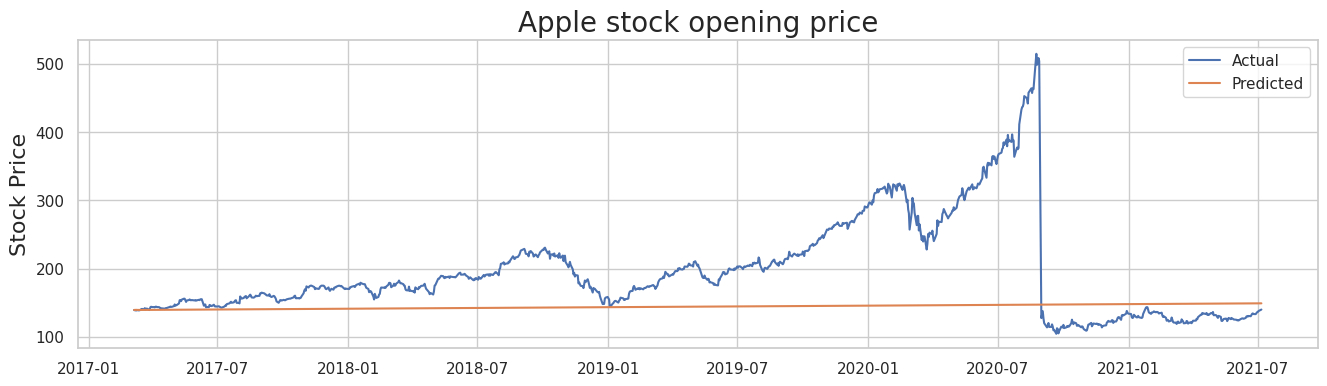

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(Apple_sales_test['Open'], label="Actual")
plt.plot(test_predictions, label="Predicted")
plt.title('Apple stock opening price', fontsize=20)
plt.ylabel('Stock Price', fontsize=16)
plt.legend()

In [ ]:
test_predictions

2017-03-06    139.463710
2017-03-07    139.535873
2017-03-08    139.605085
2017-03-09    139.637943
2017-03-10    139.550504
                 ...    
2021-07-02    149.165689
2021-07-03    149.171846
2021-07-04    149.178004
2021-07-05    149.184162
2021-07-06    149.190319
Freq: D, Name: predicted_mean, Length: 1584, dtype: float64

# AUTO-ARIMA

In [ ]:
lag_features = ["Open","Close","High", "Low",]
Apple_sales_train_rolled_7d = Apple_sales_train[lag_features].rolling(window=7, min_periods=0)
Apple_sales_mean_7d = Apple_sales_train_rolled_7d.mean().shift(1).reset_index()

In [ ]:
! pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 7.1 MB/s eta 0:00:008.3 MB/s eta 0:00:01


In [ ]:
from pmdarima import auto_arima
model = auto_arima(
	Apple_sales_train["Open"],
	exogenous=Apple_sales_train[lag_features],
	trace=True,
	error_action="ignore",
	suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=38629.022, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39543.728, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38787.041, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38977.212, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39541.747, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=38629.173, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=38663.938, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=38629.467, Time=1.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=38630.749, Time=2.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=38758.688, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=38629.036, Time=1.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=38628.603, Time=0.72 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=38631.425, Time=0.37 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=38628.377, Time=1.84 sec
 ARIMA(4,1,0)(0,0,0

In [ ]:
forecast = model.predict(n_periods=len(Apple_sales_test['Open']),  exogenous=Apple_sales_test[lag_features])

In [ ]:
forecast

2017-03-06    139.490386
2017-03-07    139.553953
2017-03-08    139.593963
2017-03-09    139.576407
2017-03-10    139.576769
                 ...    
2021-07-02    139.572817
2021-07-03    139.572817
2021-07-04    139.572817
2021-07-05    139.572817
2021-07-06    139.572817
Freq: D, Length: 1584, dtype: float64

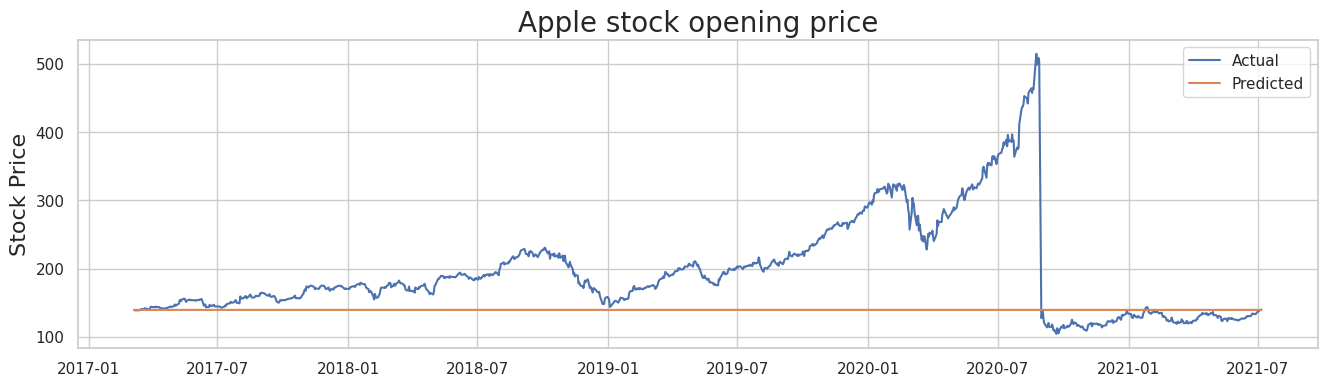

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(Apple_sales_test['Open'], label="Actual")
plt.plot(forecast, label="Predicted")
plt.title('Apple stock opening price', fontsize=20)
plt.ylabel('Stock Price', fontsize=16)
plt.legend()

# SMA

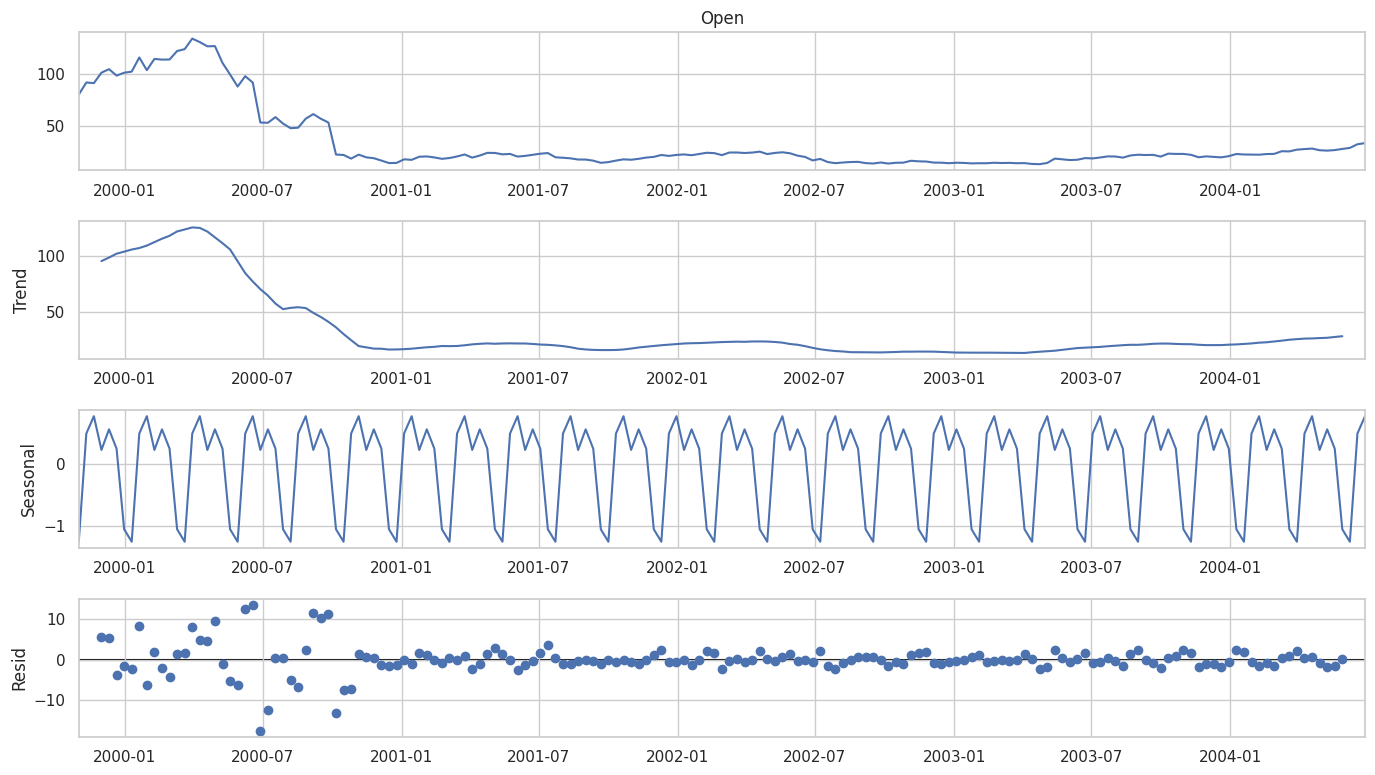

In [ ]:
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(lim_Apple_sales['Open'],model='additive')
fig = result.plot()

In [ ]:
plot_acf(lim_Apple_sales['Total'], lags=48);
plot_pacf(lim_Apple_sales['Total'], lags=30);

NameError: name 'lim_catfish_sales' is not defined

In [ ]:
!pip install stldecompose

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from stldecompose import decompose, forecast

temp = Apple_open_sales.reset_index()
df_stl_month = temp[['index', 'timeseries']].set_index('index')
decomp = decompose(df_stl_month.values, period=12)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

ImportError: cannot import name '_maybe_get_pandas_wrapper_freq' from 'statsmodels.tsa.filters._utils' (/home/arup/.local/lib/python3.10/site-packages/statsmodels/tsa/filters/_utils.py)

In [ ]:
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)
lim_Apple_sales=lim_Apple_sales.dropna()
result = seasonal_decompose(lim_Apple_sales,model='additive')
fig = result.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
Apple_sales.dropna()

,Low,High,Close,Open
Date,,,,
1999-11-01,77.370,80.69,77.62,80.00
1999-11-02,77.310,81.69,80.25,78.00
1999-11-03,81.000,83.25,81.50,81.62
1999-11-04,80.620,85.37,83.62,82.06
1999-11-05,84.000,88.37,88.31,84.62
...,...,...,...,...
2021-06-29,134.350,136.49,136.33,134.80
2021-06-30,135.870,137.41,136.96,136.17
2021-07-01,135.760,137.33,137.27,136.60


In [ ]:
Apple_sales

,Low,High,Close,Open
Date,,,,
1999-11-01,77.370,80.69,77.62,80.00
1999-11-02,77.310,81.69,80.25,78.00
1999-11-03,81.000,83.25,81.50,81.62
1999-11-04,80.620,85.37,83.62,82.06
1999-11-05,84.000,88.37,88.31,84.62
...,...,...,...,...
2021-07-02,137.745,140.00,139.96,137.90
2021-07-03,NaN,NaN,NaN,NaN
2021-07-04,NaN,NaN,NaN,NaN


In [ ]:
end_date = datetime(2016,7,6)